#Titanic Survival Prediction problem

### About the Problem:
    Using the machine learning tools, we need to analyze the information about the passensgers of RMS Titanic and predict which passenger has survived. This problem has been published by Kaggle and is widely used for learning basic concepts of Machine Learning

### About the data sets

#### Data Dictionary

- Age: Age
- Cabin: Cabin
- Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- Fare: Passenger Fare
- Name: Name
- Parch: Number of Parents/Children Aboard
- Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Sex: Sex
- Sibsp: Number of Siblings/Spouses Aboard
- Survived: Survival (0 = No; 1 = Yes)
- Ticket: Ticket Number

#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### 1.0 Load data sets

In [5]:
import pandas as pd
training_df = pd.read_csv((r"C:\Users\ykmi1\Downloads\titanic_train.csv"))
training_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df = pd.read_csv(r"C:\Users\ykmi1\Downloads\test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Combine the training and test data set so that we can perform data transformations on both these sets in a single attempt. Once the data transformation is complete, the data sets have be segregated back to training and test datasets with out any mix up of samples between the data sets

In [7]:
test_df['Survived'] = 0
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [10]:
complete_data_df = pd.concat([training_df, test_df], ignore_index=True)
complete_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print("No. of Training Data samples: " + str(training_df.shape[0]))
print("No. of Test Data samples: " + str(test_df.shape[0]))
print("Complete Data samples: " + str(complete_data_df.shape[0]))

No. of Training Data samples: 891
No. of Test Data samples: 418
Complete Data samples: 1309


### 2.0 Data Pre-processing

##### 2.1 Handle Missing Data

Check for missing values in the columns 

In [12]:
complete_data_df.isnull().sum()
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Around 80% of Cabin's data is missing. So it will not be of much use to train the model. 

Let us replace the missing values for age with median. Though not a best approach to replace missing data, we shall use this method for sake of simplicity.

In [13]:
complete_data_df['Age'] = complete_data_df['Age'].fillna(complete_data_df['Age'].median())

Replace missing data for Embarked. Let us use the port where maximum passengers have boarded

In [14]:
complete_data_df.Embarked.value_counts()


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [15]:
complete_data_df['Embarked'] = complete_data_df['Embarked'].fillna('S')
complete_data_df.Embarked.unique()


array(['S', 'C', 'Q'], dtype=object)

##### 2.2 Encode categorical feature columns

Encode the values of the categorical columns -- Sex, Embarked

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
def encode_features(data_set, feature_names):
    for feature_name in feature_names:
        le = LabelEncoder()
        le.fit(data_set[feature_name])
        encoded_column = le.transform(data_set[feature_name])
        data_set[feature_name] = encoded_column
    return data_set    

In [33]:
features_to_encode = ['Sex', 'Embarked']
complete_data_df = encode_features(complete_data_df, features_to_encode)
complete_data_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsMinor
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,6,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,7,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,4,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,7,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,6,0
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,1,6,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2,6,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2,3,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2,7,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0,7,1


### 3.0 Feature Engineering

##### 3.1 Infer Title of the passengers from their names and consider it as a feature

In [19]:
parsed_names = complete_data_df.Name.str.split('[,.]')
parsed_names[:10]

0                          [Braund,  Mr,  Owen Harris]
1    [Cumings,  Mrs,  John Bradley (Florence Briggs...
2                           [Heikkinen,  Miss,  Laina]
3     [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
4                         [Allen,  Mr,  William Henry]
5                                 [Moran,  Mr,  James]
6                          [McCarthy,  Mr,  Timothy J]
7                   [Palsson,  Master,  Gosta Leonard]
8    [Johnson,  Mrs,  Oscar W (Elisabeth Vilhelmina...
9              [Nasser,  Mrs,  Nicholas (Adele Achem)]
Name: Name, dtype: object

In [20]:
titles = [str.strip(name[1]) for name in parsed_names.values]

In [21]:
complete_data_df['Title'] = titles
complete_data_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

Combine the titles with similar meanings

In [22]:
complete_data_df.Title.values[complete_data_df.Title.isin(['Mme', 'Mlle'])] = 'Mlle'
complete_data_df.Title.values[complete_data_df.Title.isin(['Capt', 'Don', 'Major', 'Sir'])] = 'Sir'
complete_data_df.Title.values[complete_data_df.Title.isin(['Dona', 'Lady', 'the Countess', 'Jonkheer'])] = 'Lady'

Encode the Title feature column

In [23]:
complete_data_df = encode_features(complete_data_df, ['Title'])

In [24]:
complete_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,7
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,7
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,6


##### 3.2 Infer if the passenger is a Minor and consider it as a feature

In [25]:
import numpy as np

In [26]:
complete_data_df['IsMinor']=np.where(complete_data_df['Age']<=16, 1, 0)

In [28]:
complete_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsMinor
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,6,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,7,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,4,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,7,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,6,0


Now, having cleaned up the data set, let us train a model and see how it performs. But before we train the model, we need prepare the list of features that we want to use to train the model and split the combined data set back into training and test data set. As we will be doing this multiple times, let us create a function for this task.

Prepare the list of features that we want to train 

In [37]:
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Title', 'IsMinor']

In [44]:
from sklearn.model_selection import train_test_split

def get_training_data(combined_data_set):
    # Assuming the first 891 rows are for training
    training_data = combined_data_set.iloc[:891].copy()
    return training_data

def get_test_data(combined_data_set):
    # Assuming rows starting from 891 onward are for testing
    test_data = combined_data_set.iloc[891:].copy()
    return test_data



In [45]:
training_data = get_training_data(complete_data_df)

Let us use the Logistic Regression algorithm for training

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(random_state=1)

Let us see how good the model performs by using calculating the accuracy of the prediction on the test data

In [48]:
features_wo_minor = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Title']

In [49]:
lr.fit(training_data[features_wo_minor], training_data['Survived'])
y_pred = lr.predict(training_data[features_wo_minor])

C:\Users\ykmi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Accuracy Score metrics

In [50]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(training_data['Survived'], y_pred )
print("Accuracy Score :" + str(acc_score))

Accuracy Score :0.8058361391694725


#### Confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(training_data['Survived'], y_pred).ravel()


In [52]:
print("Confusion Matrix:")
print("-----------------")
print("True Positive  : " + str(tp))
print("False Positive : " + str(fp))
print("True Negative  : " + str(tn))
print("False Negative  : " + str(fn))

Confusion Matrix:
-----------------
True Positive  : 239
False Positive : 70
True Negative  : 479
False Negative  : 103


#### ROC curve

In [53]:
from sklearn.metrics import roc_curve
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(training_data['Survived'], y_pred)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

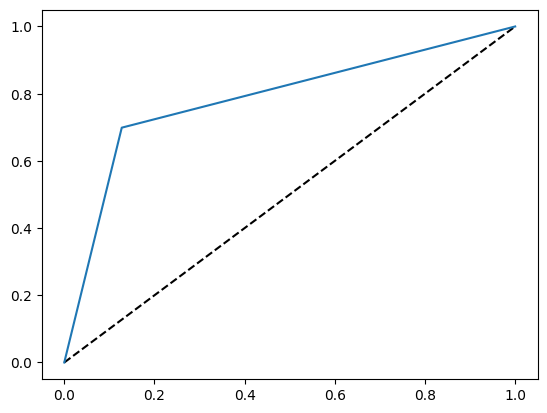

In [55]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_lm, tpr_rf_lm)